### Analyse digital signal using 1D CNN

In [1]:
# setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

from Starts.startml import *
from Starts.startmodtf import *
import matplotlib as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, Dropout
from keras.optimizers import SGD
from keras.initializers import random_uniform

data = pd.read_csv('./data/digital_signal.csv', header=None)
data.head()

local_kwargs {'data_path_1': './data/digital_signal.csv', 'data_path_2': '', 'data_path_3': '', 'drop_obj_col': False, 'nan_drop_col': False, 'nan_drop_row': False, 'nan_zero': False, 'nan_mean': True, 'nan_mean_neighbors': False}


Using TensorFlow backend.


,0,1,2,3,4,5,6,7,8,9,...,993,994,995,996,997,998,999,1000,1001,1002
0,1.15,1.76,3.30,0.053353,0.052205,0.055634,0.067048,0.086576,0.111853,0.140554,...,0.306864,0.315905,0.325406,0.335135,0.344773,0.353994,0.362396,0.369342,0.373981,0.375535
1,1.17,1.74,3.40,0.453297,0.427421,0.394495,0.362371,0.334807,0.311793,0.292468,...,-0.041243,-0.046814,-0.051548,-0.055335,-0.058006,-0.059414,-0.059606,-0.058971,-0.058172,-0.057842
2,-1.00,1.83,2.65,-1.587962,-1.641788,-1.704360,-1.750264,-1.760649,-1.726626,-1.647636,...,0.551023,0.550246,0.548295,0.546575,0.545950,0.546594,0.548123,0.549880,0.551216,0.551684
3,1.13,1.80,3.42,0.045770,0.028587,0.012289,0.007296,0.019246,0.047922,0.089389,...,0.274071,0.271366,0.268214,0.264893,0.261571,0.258323,0.255252,0.252612,0.250798,0.250181
4,1.17,1.79,3.47,0.257473,0.247620,0.238914,0.237917,0.248194,0.269635,0.299925,...,0.610546,0.610244,0.609855,0.609638,0.609874,0.610760,0.612257,0.614007,0.615414,0.615925


In [2]:
# replace all rows with values -1 in the first 3 columns (target_values)
data.iloc[:, 0:3].replace(to_replace=-1, value=0, inplace=True)
data[[0,1,2]].head()

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,0,1,2
0,1.15,1.76,3.30
1,1.17,1.74,3.40
2,0.00,1.83,2.65
3,1.13,1.80,3.42
4,1.17,1.79,3.47


In [3]:
l = [0, 1, 2]
stf = StartModTF(data, label=[0,1,2])
stf.label

[0, 1, 2]

In [4]:
# Update parameters 
new_param={'hidden_units':[1000,500,250,3], 'optimizer':'Adam', 'activation_fn':'relu', 'learning_rate': 0.0025,
           'steps':5000, 'batch_size':10, 'num_epochs':100, 'feature_scl':True}
stf.update_parameters=new_param
stf.info_parameters()


Hidden_units: [1000, 500, 250, 3] 

Optimizer: Adam 

Activation_function: relu 

Learning_Rate: 0.0025 

Training_Steps: 5000 

Batch_Size: 10 

Number_of_epochs: 100 

Feature_Scaling: True 



In [5]:
# Build and evaluate model
model, y_eval, y_pred = stf.keras_cnn_1d()

Epoch 1/100
115/115 [==============================] - 5s 46ms/step - loss: 4.2688 - acc: 0.7739
Epoch 2/100
115/115 [==============================] - 4s 37ms/step - loss: 2.0050 - acc: 0.8087
Epoch 3/100
115/115 [==============================] - 4s 37ms/step - loss: 1.0628 - acc: 0.8087
Epoch 4/100
115/115 [==============================] - 4s 37ms/step - loss: 1.0531 - acc: 0.8087
Epoch 5/100
115/115 [==============================] - 4s 38ms/step - loss: 1.0558 - acc: 0.8087
Epoch 6/100
115/115 [==============================] - 4s 37ms/step - loss: 1.0528 - acc: 0.8087
Epoch 7/100
115/115 [==============================] - 4s 38ms/step - loss: 1.0312 - acc: 0.8087
Epoch 8/100
115/115 [==============================] - 4s 38ms/step - loss: 1.0299 - acc: 0.8087
Epoch 9/100
115/115 [==============================] - 5s 47ms/step - loss: 1.0208 - acc: 0.8087
Epoch 10/100
115/115 [==============================] - 5s 47ms/step - loss: 1.0404 - acc: 0.8087
Epoch 11/100
115/115 [=======

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1000, 32)          64        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1000, 32)          1056      
_________________________________________________________________
flatten_1 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              32001000  
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 250)               125250    
__________

In [7]:
# Reset index of y_eval
StartML.idx_reset(y_eval)
y_eval.head()

,0,1,2
0,1.32,2.07,3.67
1,1.03,2.18,4.60
2,1.22,1.83,3.45
3,1.35,1.90,3.46
4,1.00,1.73,3.23


In [8]:
y_pred.head()

,0,1,2
0,0.784117,1.899687,3.875372
1,0.563588,1.393131,2.890724
2,0.681352,1.664527,3.391124
3,0.835761,2.002140,4.062653
4,0.712525,1.706906,3.537337


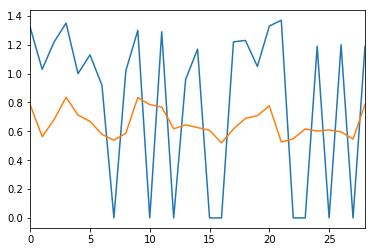

In [9]:
# compare the plot between first reponse of the predicted value and true value
y_eval[0].plot()
y_pred[0].plot()

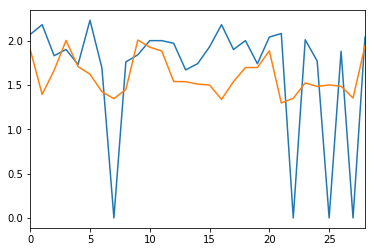

In [10]:
# compare the plot between second reponse of the predicted value and true value
y_eval[1].plot()
y_pred[1].plot()

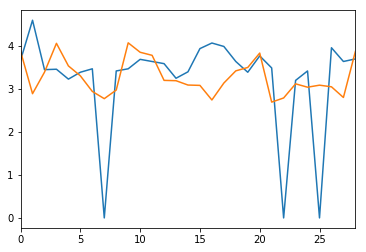

In [11]:
# compare the plot between third reponse of the predicted value and true value
y_eval[2].plot()
y_pred[2].plot()